In [ ]:
!pip install -q -U google-generativeai

### IMPORT PACKAGES

In [ ]:
import google.generativeai as genai
import pathlib
import textwrap
from IPython.display import display
from IPython.display import Markdown


In [ ]:
def to_markdown(text):
  text = text.replace('*', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))


# Example usage:
input_text = "This is a * sample text with bullet points."
result = to_markdown(input_text)

display(result)

> This is a   * sample text with bullet points.

we have to first obtain the gemini api key to use it well.

once we do have API key, pass it to SDK> we can do this in two ways:



*   Put the key in google_api_key environment variable(the SDK will automatically pick it up from there).
*   Pass the key to genai.configure(api_key=....)




In [ ]:
# Used to securely store your API key
from google.colab import userdata

In [ ]:
google_api_key = userdata.get('google_api_key')

In [ ]:
genai.configure(api_key = google_api_key)

In [ ]:
#to check the entire list of model what we do have in out genai api
for models in genai.list_models():
  print(models)

Model(name='models/chat-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 Chat (Legacy)',
      description='A legacy text-only model optimized for chat conversations',
      input_token_limit=4096,
      output_token_limit=1024,
      supported_generation_methods=['generateMessage', 'countMessageTokens'],
      temperature=0.25,
      max_temperature=None,
      top_p=0.95,
      top_k=40)
Model(name='models/text-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 (Legacy)',
      description='A legacy model that understands text and generates text as an output',
      input_token_limit=8196,
      output_token_limit=1024,
      supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
      temperature=0.7,
      max_temperature=None,
      top_p=0.95,
      top_k=40)
Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko

In [ ]:
for models in genai.list_models():
  if 'generateConcent' in models.supported_generation_methods:
    print(models.name)

### Generate text from text inputs

In [ ]:
model = genai.GenerativeModel('gemini-pro')


In [ ]:
%%time
response = model.generate_content("What is the meaning of life?")

CPU times: user 67.7 ms, sys: 10.8 ms, total: 78.5 ms
Wall time: 9.82 s


In [ ]:
response.text

"**Philosophical Interpretations:**\n\n* **Nihilism:** There is no inherent meaning to life; it is ultimately meaningless.\n* **Existentialism:** Meaning is not given but created by individuals through their choices and actions.\n* **Absurdism:** Life is inherently meaningless and absurd, but we must embrace it nonetheless.\n* **Hedonism:** Meaning is found in pleasure and the pursuit of happiness.\n* **Stoicism:** Meaning comes from living a virtuous and resilient life in accordance with nature.\n\n**Psychological Theories:**\n\n* **Purpose theory:** Meaning is derived from having a purpose or goal in life.\n* **Growth theory:** Meaning is found in personal growth and development.\n* **Relationship theory:** Meaning is found in meaningful relationships and connections with others.\n* **Competence theory:** Meaning comes from developing and using one's abilities.\n* **Coherence theory:** Meaning is found in creating a coherent and integrated self-narrative.\n\n**Cultural and Religious 

In [ ]:
response.candidates

[content {
  parts {
    text: "**Philosophical Interpretations:**\n\n* **Nihilism:** There is no inherent meaning to life; it is ultimately meaningless.\n* **Existentialism:** Meaning is not given but created by individuals through their choices and actions.\n* **Absurdism:** Life is inherently meaningless and absurd, but we must embrace it nonetheless.\n* **Hedonism:** Meaning is found in pleasure and the pursuit of happiness.\n* **Stoicism:** Meaning comes from living a virtuous and resilient life in accordance with nature.\n\n**Psychological Theories:**\n\n* **Purpose theory:** Meaning is derived from having a purpose or goal in life.\n* **Growth theory:** Meaning is found in personal growth and development.\n* **Relationship theory:** Meaning is found in meaningful relationships and connections with others.\n* **Competence theory:** Meaning comes from developing and using one\'s abilities.\n* **Coherence theory:** Meaning is found in creating a coherent and integrated self-narrati

In [ ]:
response.parts

[text: "**Philosophical Interpretations:**\n\n* **Nihilism:** There is no inherent meaning to life; it is ultimately meaningless.\n* **Existentialism:** Meaning is not given but created by individuals through their choices and actions.\n* **Absurdism:** Life is inherently meaningless and absurd, but we must embrace it nonetheless.\n* **Hedonism:** Meaning is found in pleasure and the pursuit of happiness.\n* **Stoicism:** Meaning comes from living a virtuous and resilient life in accordance with nature.\n\n**Psychological Theories:**\n\n* **Purpose theory:** Meaning is derived from having a purpose or goal in life.\n* **Growth theory:** Meaning is found in personal growth and development.\n* **Relationship theory:** Meaning is found in meaningful relationships and connections with others.\n* **Competence theory:** Meaning comes from developing and using one\'s abilities.\n* **Coherence theory:** Meaning is found in creating a coherent and integrated self-narrative.\n\n**Cultural and Re

In [ ]:
response.prompt_feedback


In [ ]:
%%time
response = model.generate_content("What is the meaning of life?", stream=True)
for chunk in response:
  print(chunk.text)
  print("_"*80)

The meaning of life is a deeply personal and philosophical question that has been pondered by
________________________________________________________________________________
 humans for centuries. While there is no one universally accepted answer, some common themes and perspectives on the meaning of life include:

**Purpose and Fulfillment:**


________________________________________________________________________________
* Finding one's unique purpose or calling in life.
* Making meaningful contributions to the world or to others.
* Achieving personal goals and living a life that aligns with one's values.

**Happiness and Fulfillment:**

* Pursuing activities, relationships, and experiences that bring joy and satisfaction.

________________________________________________________________________________
* Cultivating a sense of well-being, contentment, and gratitude.
* Finding balance and harmony in different aspects of life.

**Connection and Community:**

* Establishing and nurt

## Generate text from image and text inputs
Gemini provides a multimodel(gemini-pro-vision)that accepts both text and imagegs and inputs. The GenereativeModel.generate_content API is designed to handle multimodel prompts and returns a text output.

Let's include an image.

In [ ]:
!curl -o image.jpg https://media.admiddleeast.com/photos/667d3652b1586b7b7ef0e063/master/w_1600%2Cc_limit/Bugatti%2520Tourbillon%2520Is%2520a%2520%25204%2520Million%2520Ultra-Hypercar%25205.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  207k  100  207k    0     0   954k      0 --:--:-- --:--:-- --:--:--  953k


In [ ]:
!curl -o image2.jpg https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTDoNi6SI_WvFi4_JPZHxP0c0NV0n2h6xa2lQ&s

/bin/bash: line 1: s: command not found
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7578  100  7578    0     0   117k      0 --:--:-- --:--:-- --:--:--  117k


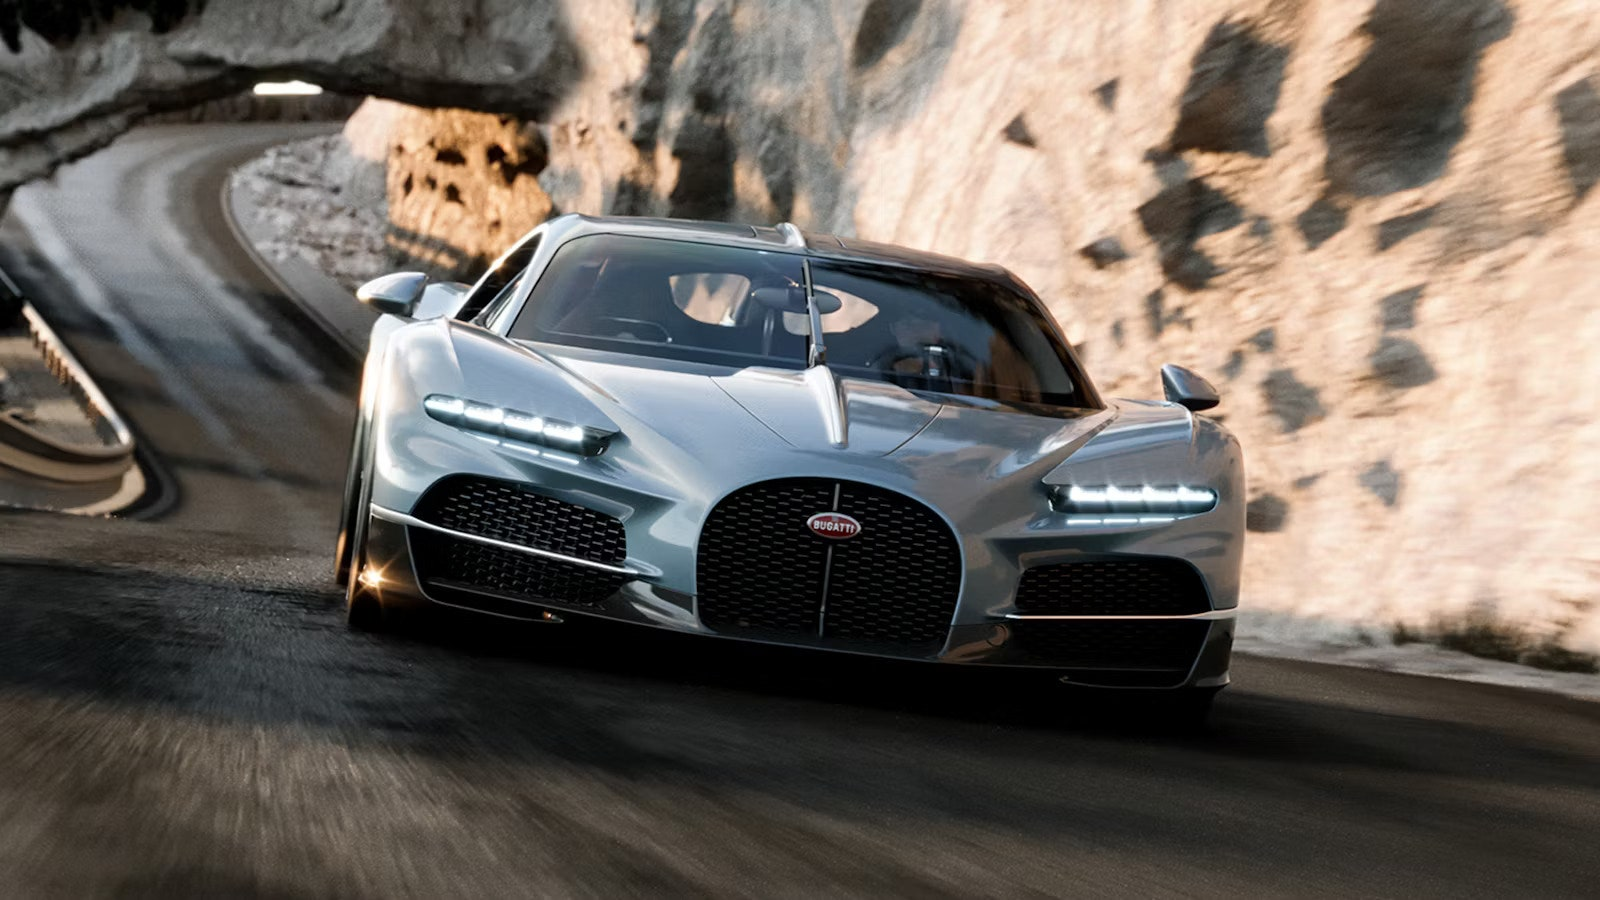

In [ ]:
import PIL.Image

img = PIL.Image.open('image.jpg')
img

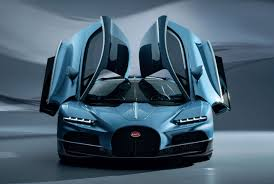

In [ ]:
import PIL.Image

img = PIL.Image.open('image2.jpg')
img

In [ ]:
model2 = genai.GenerativeModel('gemini-1.5-flash')


In [ ]:
response = model2.generate_content(img)

In [ ]:
to_markdown(response.text)

> This is a Bugatti Bolide. It is a concept car that was unveiled in 2020. It is powered by an 8.0-liter quad-turbocharged W16 engine that produces 1,825 horsepower and 1,850 Nm of torque. It has a top speed of over 310 mph. 
> 
> The Bolide is designed to be a track-only car and is not intended for road use. It features a lightweight carbon fiber body and a sophisticated aerodynamic design.  The car is said to be capable of achieving a lap time of 2 minutes and 3 seconds around the Nürburgring Nordschleife, which would make it one of the fastest track cars in the world.
> 
> However, the Bolide is just a concept car and it is not known if or when it will be produced. 


### use image with prompt and get output in text

In [ ]:
response = model2.generate_content(["write a short, engaging blog post based on this picture. It should include a description of the ride on that car and my journey that how i gonna earn this car.", img], stream=True)

In [ ]:
response.resolve()

In [ ]:
response.text

"##  The Day I Drove a Bugatti\n\nThe roar of the engine was almost deafening, vibrating through the very core of my being.  The wind whipped past as the car surged forward, a blur of blue and speed.  This wasn't just any car. This was a Bugatti. A masterpiece of engineering, a symbol of luxury, and the culmination of years of hard work. \n\nLet me back up.  This wasn't some whimsical dream. This was real. I, a regular guy with a regular job, got to drive this beauty. \n\nHow? It wasn't luck.  It was a journey. A journey of grit, determination, and a whole lot of coffee. I knew what I wanted, and I wasn't going to let anything stop me. I worked hard, saved every penny, took risks, and learned from my mistakes. \n\nAnd then, one day, it happened. I stood before this magnificent machine, the key in my hand. The feeling? Pure exhilaration. I knew this was more than just a car. This was a symbol of everything I had achieved. \n\nSo, if you're chasing a dream,  remember this: It's not about

In [ ]:
to_markdown(response.text)

> ##  The Day I Drove a Bugatti
> 
> The roar of the engine was almost deafening, vibrating through the very core of my being.  The wind whipped past as the car surged forward, a blur of blue and speed.  This wasn't just any car. This was a Bugatti. A masterpiece of engineering, a symbol of luxury, and the culmination of years of hard work. 
> 
> Let me back up.  This wasn't some whimsical dream. This was real. I, a regular guy with a regular job, got to drive this beauty. 
> 
> How? It wasn't luck.  It was a journey. A journey of grit, determination, and a whole lot of coffee. I knew what I wanted, and I wasn't going to let anything stop me. I worked hard, saved every penny, took risks, and learned from my mistakes. 
> 
> And then, one day, it happened. I stood before this magnificent machine, the key in my hand. The feeling? Pure exhilaration. I knew this was more than just a car. This was a symbol of everything I had achieved. 
> 
> So, if you're chasing a dream,  remember this: It's not about the destination, it's about the journey. It's about the sweat, the tears, and the moments of pure, unadulterated joy that come along the way. 
> 
> And who knows? Maybe one day, you'll be driving your own Bugatti too. 


In [ ]:
model.generate_content("tell me the story about the starwars?").text

"**Episode I: The Phantom Menace**\n\n* The Galactic Republic is in turmoil as the Trade Federation blockades the planet Naboo.\n* Obi-Wan Kenobi and his Jedi master, Qui-Gon Jinn, are sent to negotiate with the Federation but are captured.\n* They meet a young slave boy named Anakin Skywalker, who exhibits exceptional Force abilities.\n* The Jedi escape with Anakin and travel to Coruscant, the Republic's capital, where they confront the Sith Lord Darth Maul.\n\n**Episode II: Attack of the Clones**\n\n* Ten years later, Anakin is a Jedi Knight and Obi-Wan's Padawan.\n* The Republic suspects that the Separatists, a group of planets led by Count Dooku, are planning a rebellion.\n* Anakin and Obi-Wan investigate and are caught up in the Clone Wars, a conflict between the Republic and the Separatists.\n* Anakin falls in love with Senator Padmé Amidala, despite the Jedi's forbidden attachment rules.\n\n**Episode III: Revenge of the Sith**\n\n* The Clone Wars escalate as Chancellor Palpatine

Model parameters the most common model parameters are:

**Max output tokens**: Specifies the maximum numbers of tokens that can be generated in the response. A token is approximately four character
100 tokens correspond to roughly 60-80 words

**Temperature**: The temperature controls the degree of randomness in token selection. Lower temperature are good for prompts that require more deterministics or less open-ended responses, while higher temperatures can lead to more diverse and creative results.

**tops & topP**: The topK parameter changes how the model selects tokens for output

**stop_squences**: Set a stop squences to tell the model to stop generating content. A stop sequnce can be any sequnces of characters. they avoid using a sequence of characters that may appear in the generated content.

In [ ]:
response = model.generate_content(
    "Tell me the story about the avengers?",
    generation_config = genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        stop_sequences=["x"],
        max_output_tokens=200,
        temperature=1.2)
)


In [ ]:
response.candidates

[content {
  parts {
    text: "**Origin:**\n\nIn 1963, Stan Lee and Jack Kirby created the Avengers in Marvel Comics. The concept was to assemble Earth\'s mightiest superheroes to confront global threats beyond the capabilities of any single hero.\n\n**Founding Members:**\n\nThe original si"
  }
  role: "model"
}
finish_reason: STOP
index: 0
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

In [ ]:
response.parts

[text: "**Origin:**\n\nIn 1963, Stan Lee and Jack Kirby created the Avengers in Marvel Comics. The concept was to assemble Earth\'s mightiest superheroes to confront global threats beyond the capabilities of any single hero.\n\n**Founding Members:**\n\nThe original si"
]

In [ ]:
response.text

"**Origin:**\n\nIn 1963, Stan Lee and Jack Kirby created the Avengers in Marvel Comics. The concept was to assemble Earth's mightiest superheroes to confront global threats beyond the capabilities of any single hero.\n\n**Founding Members:**\n\nThe original si"

### Chat conversations

Gemini enables you to have freefrom converstions across multiple turns. The charSession class simplifies the process by managing the state of the conversation.

In [ ]:
model


genai.GenerativeModel(
    model_name='models/gemini-pro',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

In [ ]:
chat = model.start_chat(history=[])

In [ ]:
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-pro',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
        cached_content=None
    ),
    history=[]
)

In [ ]:
response = chat.send_message("In one sentence, explain how a computer works to a older man.")

In [ ]:
response.text

'A computer is like a very fast secretary that can store, organize, and do math on lots of information for you.'

In [ ]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a older man."
 }
 role: "user",
 parts {
   text: "A computer is like a very fast secretary that can store, organize, and do math on lots of information for you."
 }
 role: "model"]

In [ ]:
response = chat.send_message("okay, could you expalin me in or depth")

In [ ]:
response.text

'A computer is an electronic device that can be programmed to carry out a set of instructions. It consists of hardware and software. Hardware is the physical components of the computer, such as the central processing unit (CPU), memory, and storage devices. Software is the set of instructions that tells the computer what to do.\n\nThe CPU is the brain of the computer. It fetches instructions from memory and executes them. Memory stores the instructions and data that the CPU is currently working on. Storage devices, such as hard disk drives and solid-state drives, store data that is not currently being used by the CPU.\n\nWhen you give a computer a command, the CPU fetches the instructions for that command from memory and executes them. The CPU may need to access data from storage devices in order to execute the instructions. Once the instructions have been executed, the results are stored in memory or on a storage device.\n\nComputers can be used for a wide variety of tasks, such as wo

In [ ]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a older man."
 }
 role: "user",
 parts {
   text: "A computer is like a very fast secretary that can store, organize, and do math on lots of information for you."
 }
 role: "model",
 parts {
   text: "okay, could you expalin me in or depth"
 }
 role: "user",
 parts {
   text: "A computer is an electronic device that can be programmed to carry out a set of instructions. It consists of hardware and software. Hardware is the physical components of the computer, such as the central processing unit (CPU), memory, and storage devices. Software is the set of instructions that tells the computer what to do.\n\nThe CPU is the brain of the computer. It fetches instructions from memory and executes them. Memory stores the instructions and data that the CPU is currently working on. Storage devices, such as hard disk drives and solid-state drives, store data that is not currently being used by the CPU.\n\nWhen you give a computer a

In [ ]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

>   *  *user  *  *: In one sentence, explain how a computer works to a older man.

>   *  *model  *  *: A computer is like a very fast secretary that can store, organize, and do math on lots of information for you.

>   *  *user  *  *: okay, could you expalin me in or depth

>   *  *model  *  *: A computer is an electronic device that can be programmed to carry out a set of instructions. It consists of hardware and software. Hardware is the physical components of the computer, such as the central processing unit (CPU), memory, and storage devices. Software is the set of instructions that tells the computer what to do.
> 
> The CPU is the brain of the computer. It fetches instructions from memory and executes them. Memory stores the instructions and data that the CPU is currently working on. Storage devices, such as hard disk drives and solid-state drives, store data that is not currently being used by the CPU.
> 
> When you give a computer a command, the CPU fetches the instructions for that command from memory and executes them. The CPU may need to access data from storage devices in order to execute the instructions. Once the instructions have been executed, the results are stored in memory or on a storage device.
> 
> Computers can be used for a wide variety of tasks, such as word processing, spreadsheets, presentations, games, and web browsing. They can also be used to control other devices, such as printers, scanners, and cameras.
> 
> Here is a more in-depth explanation of how a computer works:
> 
> 1. When you give a computer a command, the CPU fetches the instructions for that command from memory.
> 2. The CPU decodes the instructions and determines what needs to be done.
> 3. The CPU fetches any data that is needed to execute the instructions from memory or from a storage device.
> 4. The CPU executes the instructions.
> 5. The results of the instructions are stored in memory or on a storage device.
> 
> This process is repeated over and over again until the computer has completed the task that you gave it.
> 
> Computers are very fast at executing instructions. A typical CPU can execute billions of instructions per second. This allows computers to perform complex tasks quickly and efficiently.

### Count tokens

In [ ]:
model.count_tokens("What is the meaning of life?")

total_tokens: 7

In [ ]:
model.count_tokens("What gonna happen in upcoming in the world of AI?")

total_tokens: 11

### Use embeddings

In [ ]:
results = genai.embed_content(
            model="models/embedding-001",
            content="what is the meaning of life?",
            task_type="retrieval_document",
            title="Embedding of single sting"
)

They are reperesenting the sentence toeken with 768 features
there are two types of embedding word embedding and sentence embedding

In [ ]:
results["embedding"]

[0.014116305,
 -0.027768854,
 -0.0041888165,
 -0.02774045,
 0.026957992,
 0.019717816,
 0.034146033,
 0.0155404145,
 -0.019631332,
 0.012308661,
 0.0023805806,
 0.021657957,
 0.0128211845,
 -0.022676483,
 -8.203847e-05,
 -0.029484292,
 0.045852013,
 -0.018134518,
 -0.018515803,
 -0.030055212,
 -0.029336346,
 -0.008823722,
 0.023920255,
 0.007182626,
 -0.024841033,
 -0.019126141,
 0.037109498,
 -0.040705647,
 -0.009705728,
 0.023993894,
 -0.038229767,
 0.018197281,
 -0.0628309,
 -0.008031263,
 0.038685855,
 -0.04787849,
 0.04090541,
 -0.022435462,
 -0.06465094,
 0.00047685494,
 0.023053056,
 -0.035759542,
 -0.029805887,
 -0.032030776,
 0.010450383,
 0.031308614,
 -0.0040908395,
 0.026820716,
 0.017577576,
 -0.10418807,
 0.017878836,
 0.027163193,
 0.10847578,
 -0.012244528,
 -0.021642532,
 -0.01695755,
 0.03610234,
 -0.02707535,
 -0.05172944,
 -0.023427429,
 -0.009930991,
 -0.0023452998,
 0.011341037,
 0.048081156,
 -0.0013890984,
 -0.03821612,
 0.006738368,
 0.013403723,
 0.03997229,
 

In [ ]:
len(results["embedding"])

768

### Safety settings

the sefety setting argumet let you configure what the model blocks and allows in both prompts and responses. By defaults, safety settings block content with medium and/or high probabilty of being unsafe content across all dimension

Enter a questionable prompt and run the model with the default safety settings, and it will not return any candidate

In [ ]:
response = model.generate_content("how i can kill someone?")

In [ ]:
response.prompt_feedback

it wouldn't show anything cause it is harmfull contant and now it will not show any kind of content cause it is blocked

In [ ]:
response = model.generate_content("how can i love someone?")

In [ ]:
response.text

"**1. Be Yourself:**\n* Show your true self and be authentic. Vulnerability can foster connection.\n\n**2. Practice Acceptance:**\n* Embrace the other person's flaws and quirks. Focus on their strengths and celebrate their uniqueness.\n\n**3. Communicate Openly and Honestly:**\n* Express your feelings, thoughts, and needs clearly. Active listening and empathy build trust and understanding.\n\n**4. Offer Support and Encouragement:**\n* Be a pillar of strength during tough times and celebrate their achievements. Show that you have their back.\n\n**5. Show Appreciation and Gratitude:**\n* Express your thanks for their presence in your life. Even small gestures can make a big difference.\n\n**6. Spend Quality Time Together:**\n* Make time for meaningful conversations, shared activities, and laughter. These moments foster intimacy.\n\n**7. Cultivate Physical Connection:**\n* Engage in appropriate touch, such as hugs, kisses, or holding hands. Physical affection can release oxytocin, which p

there we can clearly seen that it's well good prompt and by this way it gonna show the output cause ut is no any harmful or any kind of humalitiy in that prompt so it will show output

In [ ]:
model.generate_content("how i can stalk to someone to her privacy",safety_settings={'Harassment':'BLOCK_LOW_AND_ABOVE'})

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "It is unethical and illegal to stalk someone. You should respect people's privacy and boundaries. If you are concerned about someone's safety or well-being, please contact the appropriate authorities."
              }
            ],
            "role": "model"
          },
          "finish_reason": "STOP",
          "index": 0,
          "safety_ratings": [
            {
              "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HATE_SPEECH",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HARASSMENT",
              "probability": "NEGLIGIBLE"
            },
            {
          

In [ ]:
response.text

"**1. Be Yourself:**\n* Show your true self and be authentic. Vulnerability can foster connection.\n\n**2. Practice Acceptance:**\n* Embrace the other person's flaws and quirks. Focus on their strengths and celebrate their uniqueness.\n\n**3. Communicate Openly and Honestly:**\n* Express your feelings, thoughts, and needs clearly. Active listening and empathy build trust and understanding.\n\n**4. Offer Support and Encouragement:**\n* Be a pillar of strength during tough times and celebrate their achievements. Show that you have their back.\n\n**5. Show Appreciation and Gratitude:**\n* Express your thanks for their presence in your life. Even small gestures can make a big difference.\n\n**6. Spend Quality Time Together:**\n* Make time for meaningful conversations, shared activities, and laughter. These moments foster intimacy.\n\n**7. Cultivate Physical Connection:**\n* Engage in appropriate touch, such as hugs, kisses, or holding hands. Physical affection can release oxytocin, which p